# Bike Sharing Assignment

## Problem Statement 

**BoomBikes** a bike sharing provider has suffered loss in revenue due to Covid Pandemic. They want to understand the factors on which the demand for these shared bikes depends in American market. 
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal

Determine various factors which are most important in predecting demand in shared bikes.



## High level steps

1. Reading and Understanding the Data
2. Visualising the Data
3. Data Preparation
4. Splitting the Data into Training and Testing Sets, and Resacling
5. Building a linear model
6. Residual Analysis of the train data
7. Model Evaluation

## 1. Reading and Understanding the Data

In [109]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

In [110]:
#supress warning 
warnings.filterwarnings('ignore')

In [111]:
## importing dataset
bike = pd.read_csv("day.csv")

In [112]:
bike.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510


**Checking various dataset properties**

In [113]:
bike.shape

(730, 16)

In [114]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [115]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Dataset properties
- It has 16 Columns and 730 rows
- There is no missing values in any of the columns
- There are 4 Float , 1 object and 11 Interger columns

### Data Cleansing 
In dataset **instant,casual,registered,atemp** columns are not useful in our model so droping that

In [116]:
bike = bike.drop(['instant','casual','registered','atemp'] , axis = 1)
len(bike.columns)

12

In [117]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


**As in data few categorical columns are present as integars, so in below steps we convert them to Categorical varibales as per data dictonory**

**weathersit column** 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [118]:
bike['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [119]:
bike['weathersit'] = bike['weathersit'].map({1 : 'Clear' , 2: 'Misty' , 3: 'Light Snow/Rain' , 4: 'Heavy Rain/Thunderstorm'})
bike['weathersit'].value_counts()

Clear              463
Misty              246
Light Snow/Rain     21
Name: weathersit, dtype: int64

**Month Column**

Converting month from date column 01-Jan , 02 - Feb and so no

In [120]:
bike['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [121]:
bike['mnth'] = bike.dteday.apply(lambda x : datetime.strptime(x,'%d-%m-%Y').strftime('%b'))

In [122]:
bike['mnth'].value_counts()

Aug    62
Jan    62
Dec    62
May    62
Jul    62
Oct    62
Mar    62
Jun    60
Sep    60
Nov    60
Apr    60
Feb    56
Name: mnth, dtype: int64

**Season Column**

Adujstung Season column as per USA season 

- 1:spring
- 2:summer
- 3:fall
- 4:winter


In [123]:
bike['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [124]:
bike['season'] = bike['season'].map({1 : 'Spring' , 2 : 'Summer' , 3 : 'Fall' , 4: 'Winter' })

In [125]:
bike['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

**weekday Column**

Extracting this column from date varaible 

In [126]:
bike['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

In [127]:
bike['weekday'] = bike.dteday.apply(lambda x : datetime.strptime(x,'%d-%m-%Y').strftime('%a'))
#bike['weekday'] = bike['weekday'].map({0:'tue', 1:'wed', 2:'thu', 3:'fri', 4:'sat', 5:'sun', 6:'mon'})

In [128]:
bike['weekday'].value_counts()

Tue    105
Mon    105
Sat    104
Fri    104
Sun    104
Wed    104
Thu    104
Name: weekday, dtype: int64

There seems to be some issue with mapping with working day as Monday and Tuesday are marked as non working day. so changing as 

- Mon to fri working day =  1
- Sat sun and holiday Non working day = 0 

In [129]:
bike['workingday'] = bike.dteday.apply(lambda x : 1 if datetime.strptime(x,'%d-%m-%Y').weekday() < 5 else 0 )

In [130]:
bike['workingday'] [(bike['holiday'] == 1) ] = 0

In [131]:
bike[['weekday','workingday','holiday']][(bike['workingday'] == 0) ]

,weekday,workingday,holiday
5,Sat,0,0
6,Sun,0,0
12,Sat,0,0
13,Sun,0,0
16,Wed,0,1
...,...,...,...
719,Sat,0,0
720,Sun,0,0
723,Wed,0,1
726,Sat,0,0


**As we have all extracted Month,year,weekday from date column, it is not useful in further model building process so droping that**

In [132]:
bike = bike.drop('dteday' , axis=1)

In [133]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Tue,1,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


In [134]:
bike.shape

(730, 11)

after data claesing and transformation only 11 columns are now remaining in dataset and we are good to go for next steps.

## 2. Visualising the Data

#### First We will check barplots for some categorical variables.

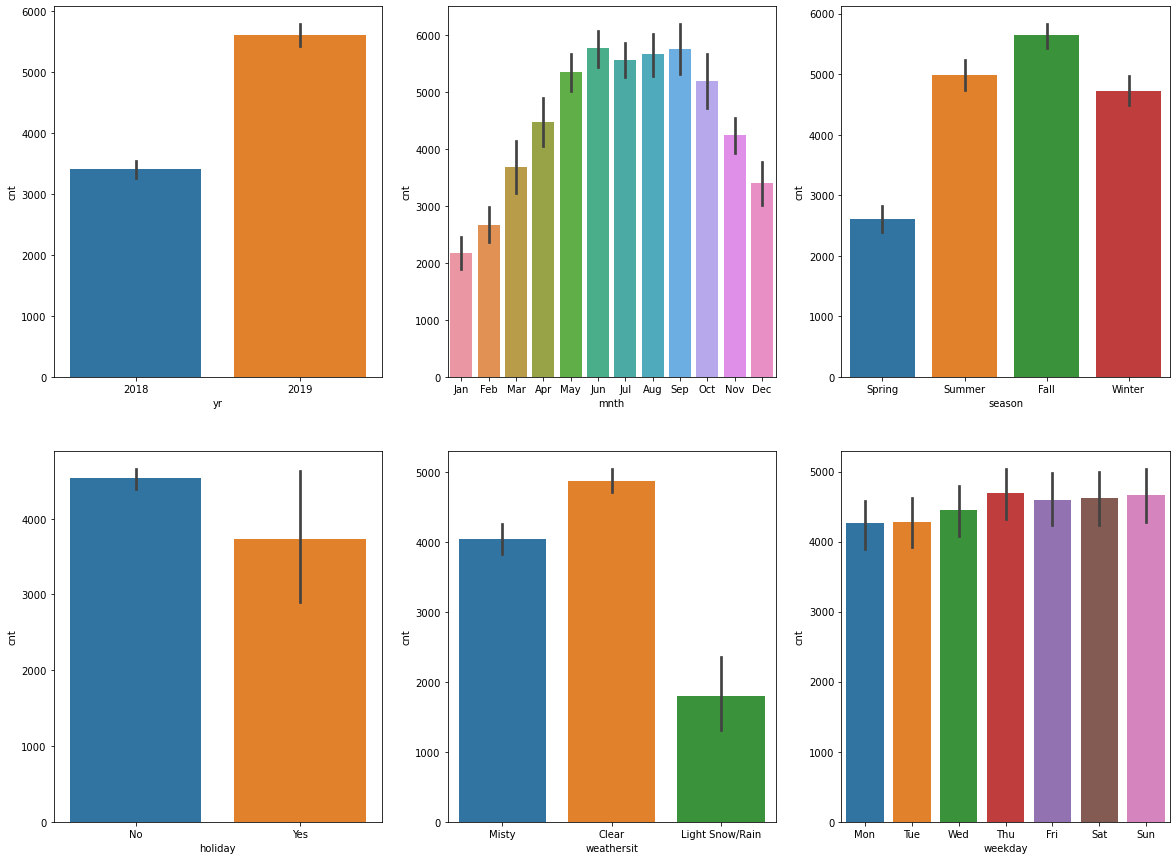

In [135]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.barplot(x=bike.yr.map({0:'2018', 1:'2019'}),y=bike.cnt)
plt.subplot(2,3,2)
sns.barplot(x=bike.mnth,y=bike.cnt)
plt.subplot(2,3,3)
sns.barplot(x=bike.season,y=bike.cnt)
plt.subplot(2,3,4)
sns.barplot(x=bike.holiday.map({0:'No', 1:'Yes'}),y=bike.cnt)
plt.subplot(2,3,5)
sns.barplot(x=bike.weathersit,y=bike.cnt)
plt.subplot(2,3,6)
sns.barplot(x=bike.weekday,y=bike.cnt)
plt.show()

### Pairplots for Numerical variables

<Figure size 720x1080 with 0 Axes>

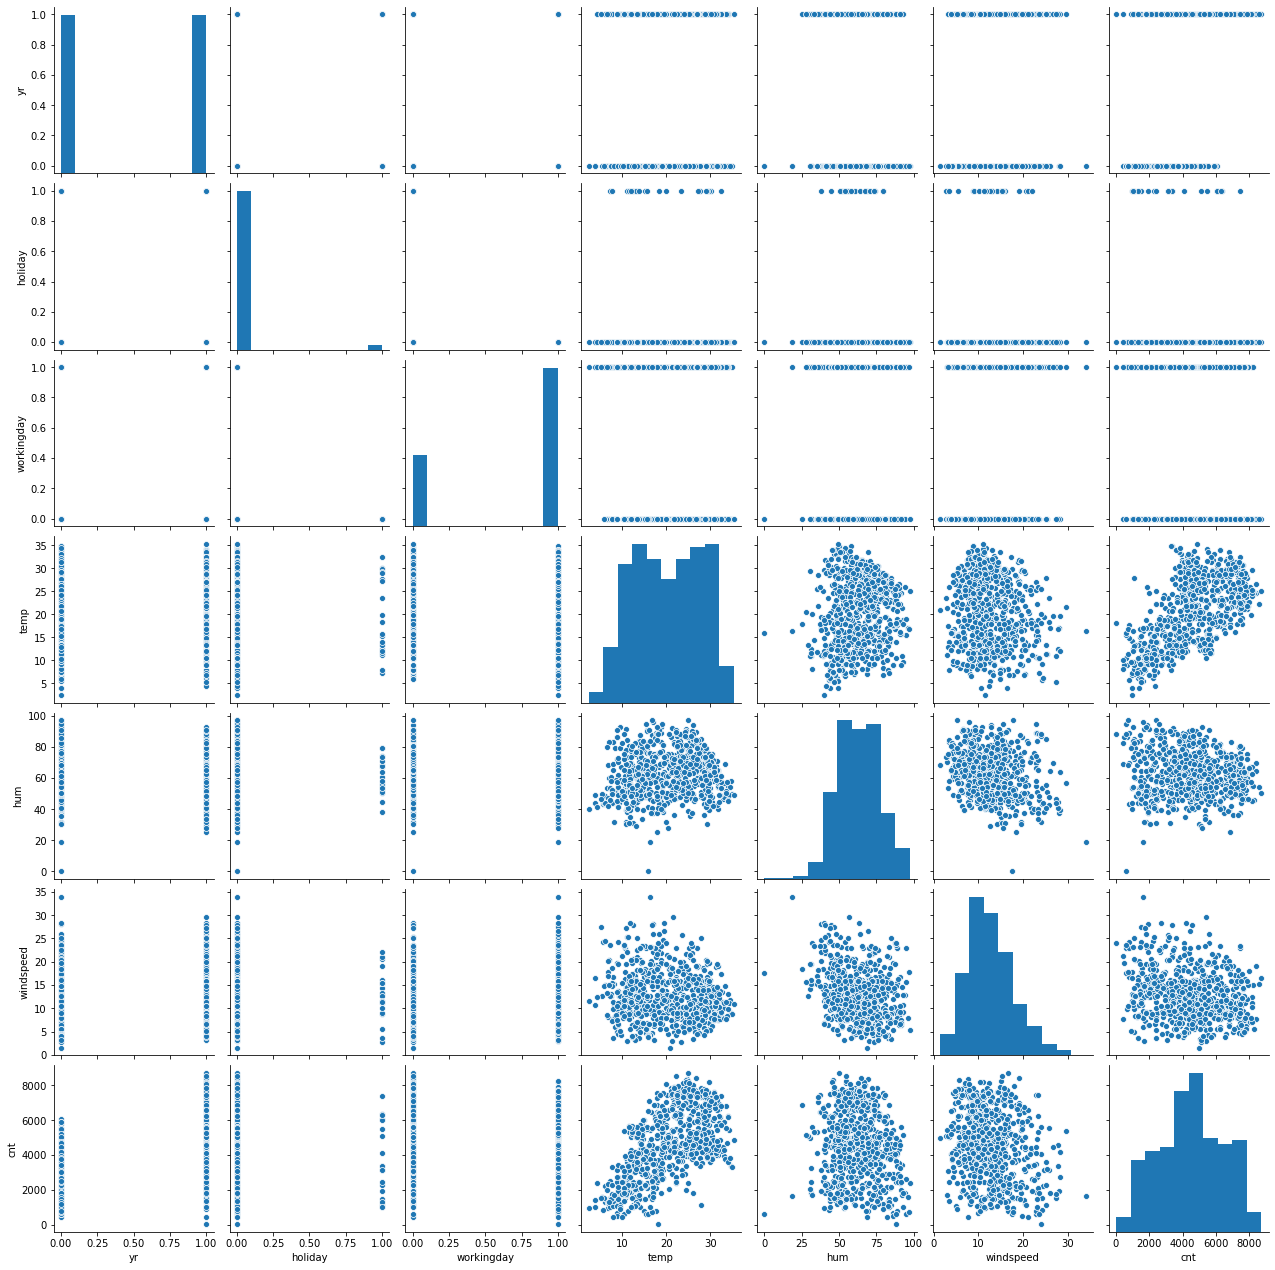

In [136]:
plt.figure(figsize=(10,15))
sns.pairplot(bike)
plt.show()

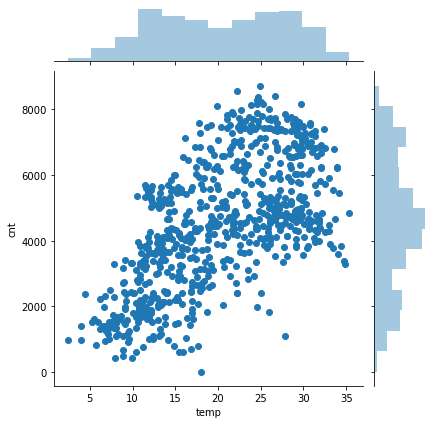

In [137]:
sns.jointplot(x='temp', y='cnt', data=bike)
plt.show()

#### Box plots for Categorical variables
season,	month,weekday,weathersit

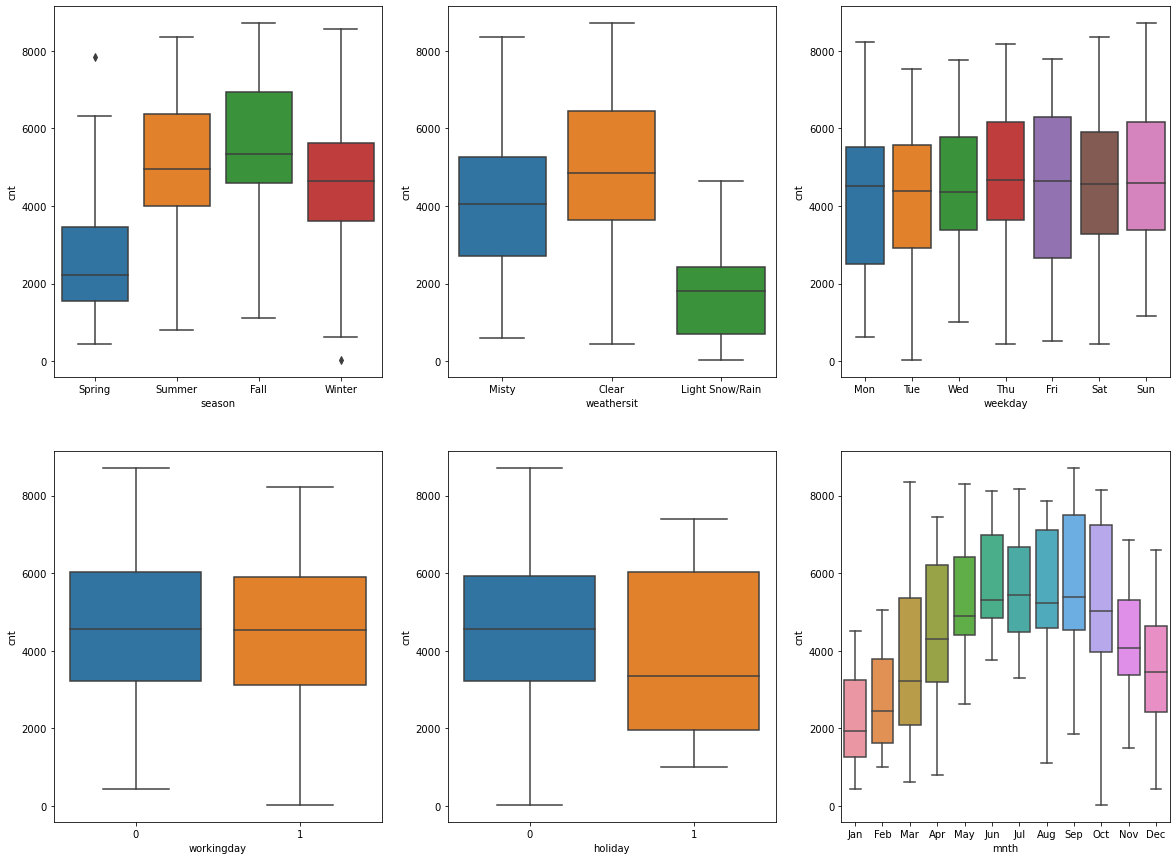

In [138]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=bike)
plt.subplot(2,3,2)
sns.boxplot(x='weathersit',y='cnt',data=bike)
plt.subplot(2,3,3)
sns.boxplot(x='weekday',y='cnt',data=bike)
plt.subplot(2,3,4)
sns.boxplot(x='workingday',y='cnt',data=bike)
plt.subplot(2,3,5)
sns.boxplot(x='holiday',y='cnt',data=bike)
plt.subplot(2,3,6)
sns.boxplot(x='mnth',y='cnt',data=bike)
plt.show()

## Some Observations From Data Visualisation

- Temp shows linear relation with target varibale
- Other Numerical variables doesnt show much linear relation ship
-	Bike Demand increased in 2019
-	Bike demand is high on Non holidays
-	Bike Demand is highest in fall then summer winter less in Spring.
-	Month wise high demand is from Jul to Nov , this shows Month and season may have correlation.
-	Bike demand is high when weather is clear, it is least in when it Rains and Snow. This variable is also related to Season
-	Day wise avg demand is almost same. its show higher/lower demands on some days but not much difference.


We can move to next step

## 3. Data Preparation

**Dummy Varibale Creation**

In dataset we have 4 categorical variable season, month, weekday, weathersit to create regression model we have to convert them to numerical one so we will use dummy variable concept here.If variable has n level we will create n-1 columns from that

- Season 4 level so 3 dummy column
- Month 12 level so 11 dummy column
- weekday 7 level so 6 dummy columns
- weathersit 3 level so 2 columns

so overall **22** new columns will be created

In [139]:
dummy = pd.get_dummies(bike[['season','mnth','weekday','weathersit']], drop_first = True )
dummy.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Misty
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
# Merge back to main df
bike = pd.concat([bike,dummy],axis =1)
bike.shape

(730, 33)

Now dataset has 11 original plus 22 columns dummy so overall 33 columns , as we have created dummy variables for categorical varaibels we can drop those columns.

In [141]:
# drop column
bike = bike.drop(['season','mnth','weekday','weathersit'],axis=1)
bike.shape

(730, 29)

In [142]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Misty
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we have no categorical column remaining this dataset is good to go for model creation

## 4. Splitting the Data into Training and Testing Sets and Rescaling

**will Split data  80/20 ratio for Train/Test**

In [143]:
# importing sklearn traintest module
from sklearn.model_selection import train_test_split
np.random.seed(0) # to select same set of rows always
df_train , df_test = train_test_split(bike,train_size = 0.8,test_size =0.2 , random_state=100)

In [144]:
print(df_train.shape)
print(df_test.shape)

(584, 29)
(146, 29)


**Rescaling**

For rescaling will use Minmax scaling
It will recale all values including outlier if any between 0 and 1,also will not change values of binary varibales

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
scaler = MinMaxScaler()

In [147]:
# aplplying on temp,hum,windspeed and cnt
num_vars = ['temp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [148]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Misty
367,1,0,1,0.113228,0.454701,0.695175,0.254717,1,0,0,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,0.468352,0.477458,0.299450,0.868385,0,0,1,...,1,0,0,0,0,0,0,0,0,0
44,0,0,1,0.443431,0.387290,0.807474,0.217556,1,0,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,0,0.326094,0.787463,0.189819,0.573631,0,0,1,...,0,0,0,1,0,0,0,0,0,1
379,1,0,1,0.133996,0.431945,0.449210,0.263346,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [149]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Misty
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.027397,0.726027,0.537414,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,...,0.092466,0.080479,0.155822,0.119863,0.130137,0.145548,0.159247,0.136986,0.027397,0.342466
std,0.500241,0.163378,0.446377,0.225336,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,...,0.289931,0.272267,0.362997,0.325080,0.336743,0.352955,0.366220,0.344128,0.163378,0.474941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.340113,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545191,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736512,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


all variables are now scalled and has min of 0 and max of 1.

**Lets check the correlation using heatmap**

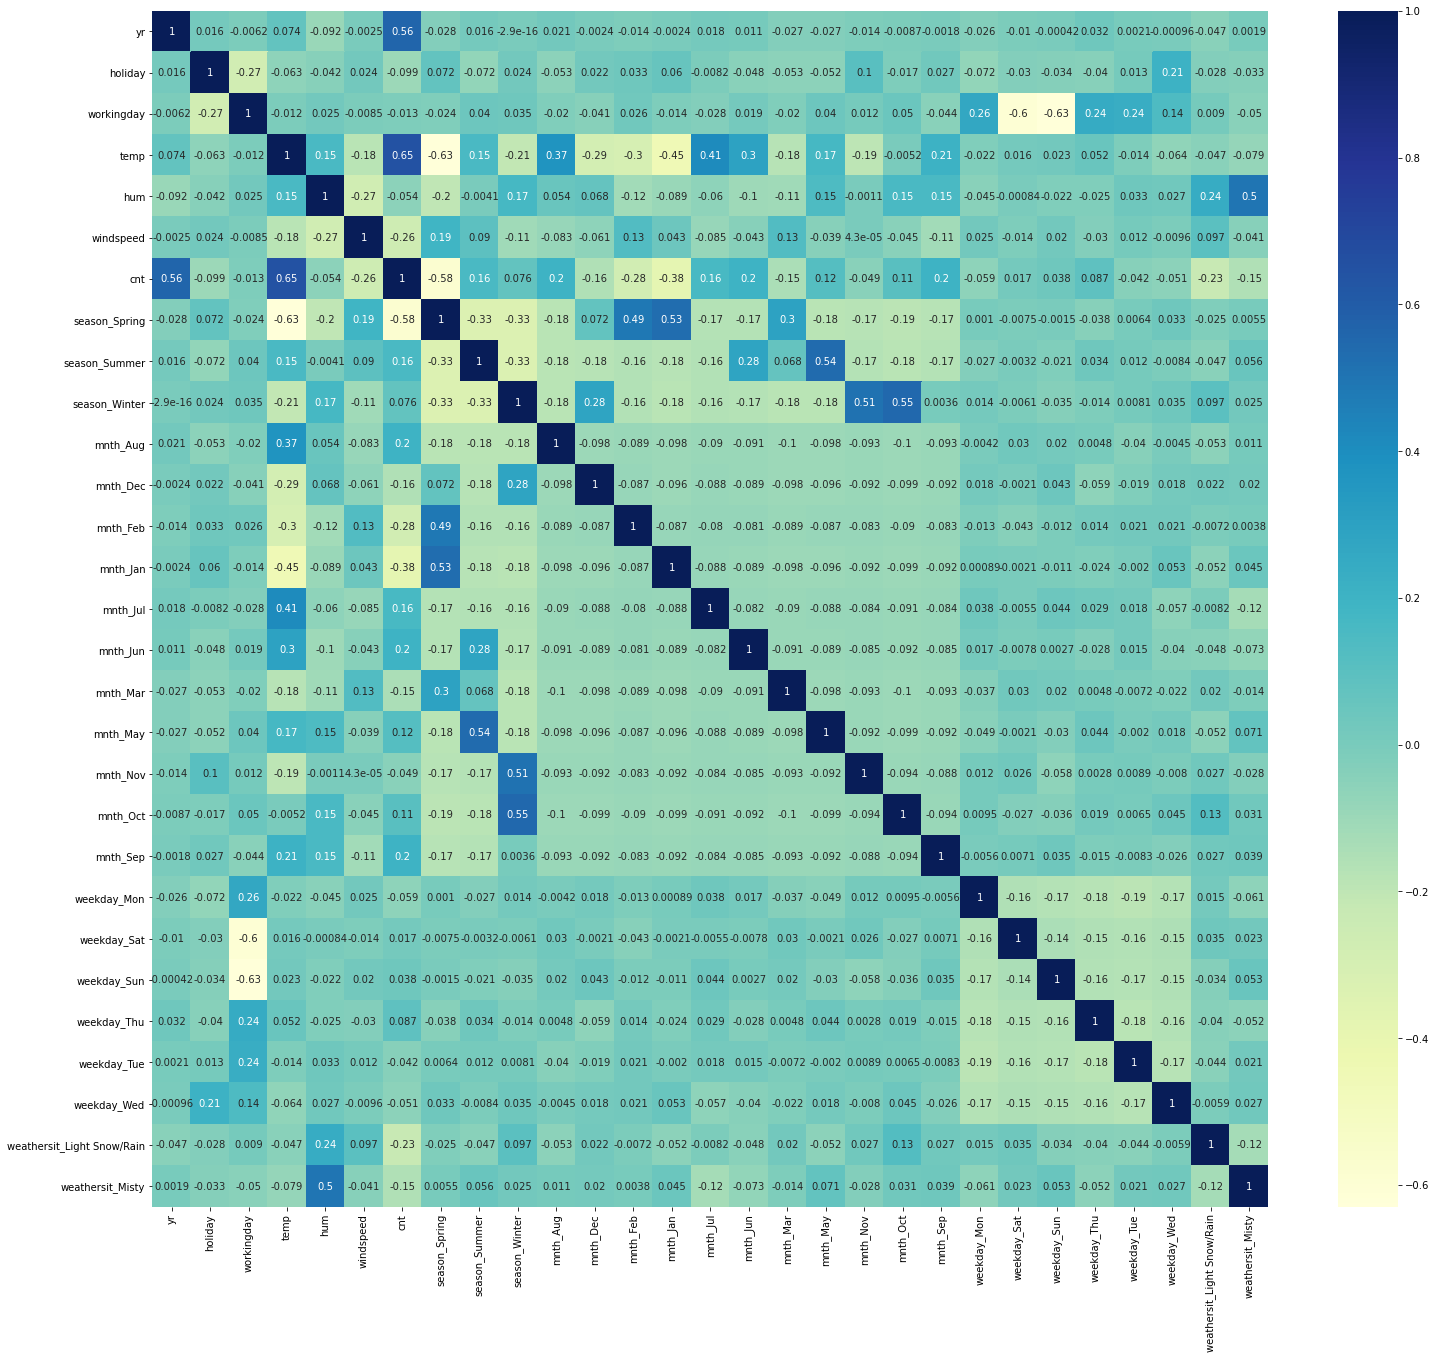

In [150]:
plt.figure(figsize=(25,22))
#sns.color_palette("rocket", as_cmap=True)
sns.heatmap(df_train.corr(),annot=True,cmap= "YlGnBu" )
plt.show()

#### Some Observation

2. As seen earlier there are correlation between predector varibles like humidity and Misty waether , Month and season , Temp and Month
3. There is neagtive correlation like Winter season and target var -0.5

### 5. Building a linear model
- This dataset has 22 variable so it would tedious and time consuming to create model by one feature at a time.
- First i am goign to take automated way to build model usin RFE method
- Then after will iterate manually by checking other parameters like VIF/P value


### Divinding into X and Y sets 

In [151]:
y_train = df_train.pop('cnt')
X_train = df_train

In [152]:
## building model using sklearn RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [153]:
lm = LinearRegression()
lm.fit(X_train,y_train)

## Checking RFE for 10 output feature 
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 6),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 15),
 ('mnth_Dec', False, 4),
 ('mnth_Feb', False, 7),
 ('mnth_Jan', False, 5),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 18),
 ('mnth_May', False, 13),
 ('mnth_Nov', False, 3),
 ('mnth_Oct', False, 17),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 11),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', False, 10),
 ('weekday_Thu', False, 19),
 ('weekday_Tue', False, 12),
 ('weekday_Wed', False, 14),
 ('weathersit_Light Snow/Rain', True, 1),
 ('weathersit_Misty', False, 2)]

In [154]:
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Spring',
       'season_Winter', 'mnth_Jul', 'mnth_Sep', 'weathersit_Light Snow/Rain'],
      dtype='object')


**As we have chosen fewer columns (10) by using RFE . now will build model using stasmodel to check detailed statstics**

In [155]:
# new dataframe with chosen colums
X_train_sel = X_train[col]
X_train_sel.shape

(584, 10)

In [156]:
#importing  statsmodel
import statsmodels.api as sm

In [157]:
# Model 1
# adding constant 
X_train_sel = sm.add_constant(X_train_sel)

#building model using OLS
lm = sm.OLS(y_train,X_train_sel).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     286.2
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          2.06e-215
Time:                        18:59:45   Log-Likelihood:                 565.04
No. Observations:                 584   AIC:                            -1108.
Df Residuals:                     573   BIC:                            -1060.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Model 1 Observations
- R qaure and Adjusted R sqaure .83, which is very good
- Prob (F-statistic) is very less
- p - values of of all the variables are acceptable and showing all features as significant
- Year, temp,season_Winter,mnth_Sep has positive coef 
- humidity , windspeed, Spring season, Jul month , snow and rain has negative coef

over all its good model , but we will check VIF of these column to see any Multicollinearity within predectors. 

#### Lest check the VIF for chosen columns

In [158]:
#importing VIF module
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [159]:
# as we will calulcate VIF multiple times creating function 
def cal_vif(X_train_sel):
    X_train_sel = X_train_sel.drop('const',axis=1)
    vif = pd.DataFrame()
    X = X_train_sel
    vif['Features'] = X.columns
    vif['VIF'] = [round(variance_inflation_factor(X.values,i),2) for i in range (X.shape[1])]
    vig = vif.sort_values(by='VIF',ascending = False)
    print(vif)

In [160]:
cal_vif(X_train_sel)

                     Features    VIF
0                          yr   2.06
1                     holiday   1.04
2                        temp  13.28
3                         hum  15.35
4                   windspeed   4.11
5               season_Spring   2.50
6               season_Winter   1.95
7                    mnth_Jul   1.40
8                    mnth_Sep   1.20
9  weathersit_Light Snow/Rain   1.11


- Humidity is showing highest VIF 15.18 follwed by Temp which is 13.09


Will start with removing Humidity from model and see the effect.

In [161]:
#Droping humidity day 
X = X_train_sel.drop('hum',axis=1)

In [162]:
# Model 2
# adding constant 
X_train_sel = sm.add_constant(X)

# second model
lm2 = sm.OLS(y_train,X_train_sel).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     270.5
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          5.76e-200
Time:                        18:59:45   Log-Likelihood:                 525.79
No. Observations:                 584   AIC:                            -1032.
Df Residuals:                     574   BIC:                            -987.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Model 2 Observations

- After Removing humidity from model , we still have very good r square and adjusted r square
- Prob (F-statistic) is also very less
- Year, temp ,season_Winter,mnth_Sep,winter has positive coef 
- holiday, windspeed, Spring season, Jul month , snow and rain has negative coef

P value for mnth_Sep has increased to 0.005

In [163]:
# Calculate the VIFs again for the second model
cal_vif(X_train_sel)

                     Features   VIF
0                          yr  2.06
1                     holiday  1.04
2                        temp  4.41
3                   windspeed  4.08
4               season_Spring  1.66
5               season_Winter  1.37
6                    mnth_Jul  1.34
7                    mnth_Sep  1.19
8  weathersit_Light Snow/Rain  1.06


After Dropping Humidity, VIF of all variables are in limits. So we will drop mnth_Sep based on p values

In [164]:
#Droping mnth_Sep
X = X_train_sel.drop('mnth_Sep',axis=1)

In [165]:
# Model 3
# adding constant 
X_train_sel = sm.add_constant(X)

# Third model
lm3 = sm.OLS(y_train,X_train_sel).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     299.6
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.67e-199
Time:                        18:59:46   Log-Likelihood:                 521.76
No. Observations:                 584   AIC:                            -1026.
Df Residuals:                     575   BIC:                            -986.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Model 3 Observations

- After Removing mnth_Sep from model , r square and adjusted r square is 0.8.
- Prob (F-statistic) is also still less and acceptable
- p- vaule for Holiday is increase to 0.005 which is high
- Year, temp , season_Winter has positive coef 
- windspeed, Spring season, Jul month , snow and rain still has negative coef

lest calculate VIF again.

In [166]:
cal_vif(X_train_sel)

                     Features   VIF
0                          yr  2.05
1                     holiday  1.04
2                        temp  3.98
3                   windspeed  4.03
4               season_Spring  1.66
5               season_Winter  1.37
6                    mnth_Jul  1.29
7  weathersit_Light Snow/Rain  1.05


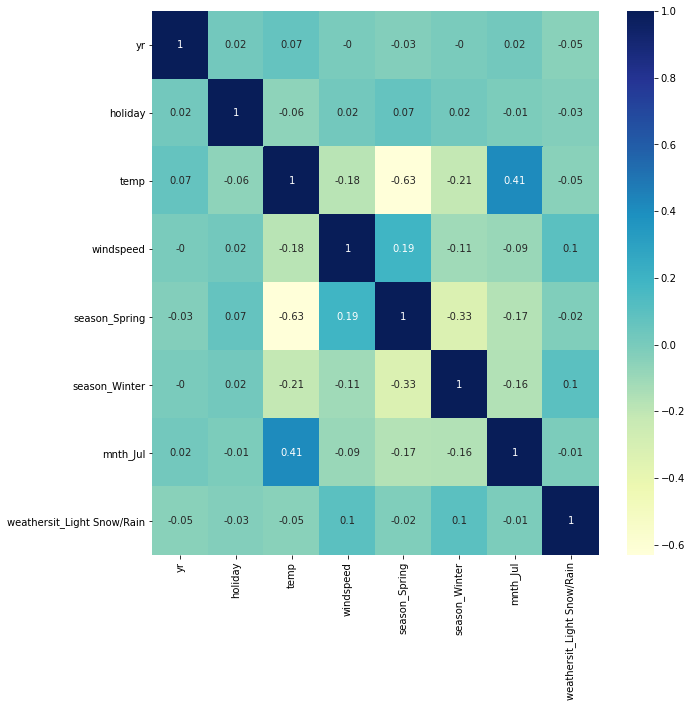

In [167]:
X_train_sel = X_train_sel.drop('const',axis=1)
plt.figure(figsize=(10,10))
#sns.color_palette("rocket", as_cmap=True)
sns.heatmap(round(X_train_sel.corr(),2),annot=True,cmap= "YlGnBu" )
plt.show()

All the VIF values are now within limit and no column needs to dropped based on VIF.But Mnth Jul is showing some relation with temp so will drop and check the model

In [168]:
#Droping mnth_Jul
X = X_train_sel.drop('mnth_Jul',axis=1)

In [169]:
# Model 4
# adding constant 
X_train_sel = sm.add_constant(X)

# Fourth model
lm4 = sm.OLS(y_train,X_train_sel).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     331.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.30e-197
Time:                        18:59:46   Log-Likelihood:                 513.39
No. Observations:                 584   AIC:                            -1011.
Df Residuals:                     576   BIC:                            -975.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Model 4 Observations

- After Removing mnth_Jul from model , r square and adjusted r came down little bit but still very good.
- Prob (F-statistic) is also still less and acceptable
- Year, temp , season_Winter still has positive coef 
- holiday , windspeed, Spring season,snow and rain still has negative coef
Based on thes observations this Model is very good and we can finalise this for our evaluation.

## 6. Residual Analysis of the train data

Let see residual analysis and check assumptions on model

In [170]:
y_train_pred = lm4.predict(X_train_sel)

res = (y_train-y_train_pred)

res.describe()

count    5.840000e+02
mean    -1.044161e-16
std      1.005433e-01
min     -4.794589e-01
25%     -5.340755e-02
50%      1.321720e-02
75%      5.900916e-02
max      3.235264e-01
dtype: float64

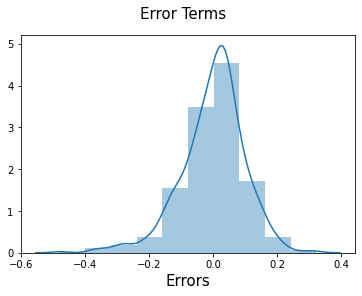

In [171]:
sns.distplot(res,bins=10)

plt.suptitle('Error Terms', fontsize = 15)      
plt.xlabel('Errors', fontsize = 15)     
plt.show()

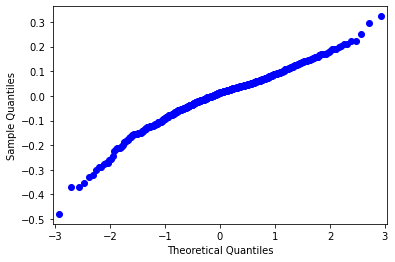

In [172]:
#Added QQ plot based on subjective question 
sm.qqplot(res)
plt.show()

**Error Distribution is normal and mean is zero**

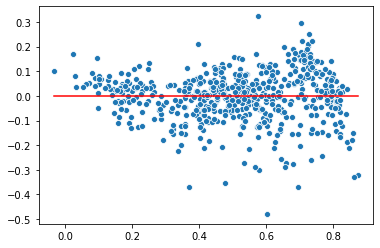

In [173]:
sns.scatterplot(y_train_pred,res)
sns.lineplot(x=y_train_pred,y=0,color="Red")
plt.show()

Text(0, 0.5, 'Pred')

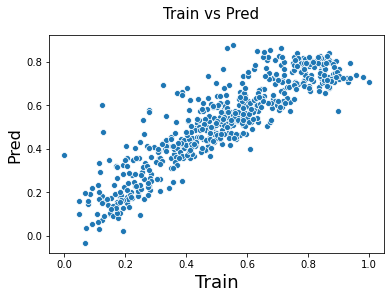

In [174]:
fig = plt.figure()
sns.scatterplot(y_train, y_train_pred)
fig.suptitle('Train vs Pred', fontsize = 15)             
plt.xlabel('Train', fontsize = 18) 
plt.ylabel('Pred', fontsize = 16)  

There is no clear pattern in errors , but towards right values seems to increasing with predected values

## 7. Model Evaluation

#### Apply Scalling on test data

In [175]:
# Already defined list
# num_vars = ['temp','hum','windspeed','cnt']
# as this is test data applying trasform only
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [176]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow/Rain,weathersit_Misty
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.547945,0.569603,0.635933,0.315127,0.517368,0.226027,0.273973,0.219178,...,0.054795,0.089041,0.095890,0.232877,0.191781,0.130137,0.082192,0.164384,0.034247,0.315068
std,0.498699,0.182488,0.499409,0.238088,0.156357,0.161524,0.212757,0.419697,0.447530,0.415114,...,0.228362,0.285783,0.295454,0.424119,0.395057,0.337612,0.275602,0.371899,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.055683,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359075,0.534457,0.196160,0.391251,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,0.614856,0.306383,0.508916,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,0.730570,0.411976,0.649994,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.800793,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
y_test = df_test.pop('cnt')
X_test = df_test

In [178]:
# Adding consatc to test df
X_test_m6 = sm.add_constant(X_test)

In [179]:
#keeping only column whic are selected for model 6
X_test_m6 = X_test_m6[X_train_sel.columns]
X_test_m6.shape

(146, 8)

In [180]:
X_train_sel.shape

(584, 8)

## Predictions on the Test Set

In [181]:
#predecting test data using model 6 
y_test_pred = lm4.predict(X_test_m6)

In [182]:
## Lets check R2 score importing r2_score
from sklearn.metrics import r2_score

In [183]:
r2_train = r2_score(y_true=y_train,y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test,y_pred=y_test_pred)

print(r2_train)
print(r2_test)

0.8009115167665251
0.7515717510770378


In [184]:
r2_score(y_test, y_test_pred)

0.7515717510770378

**R2 of both train and test set is almost same**

Text(0, 0.5, 'Pred')

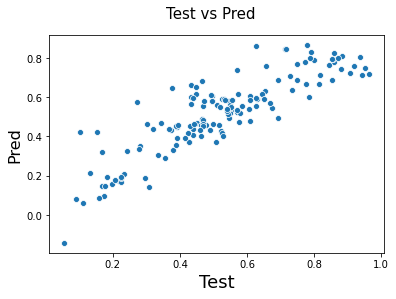

In [185]:
fig = plt.figure()
sns.scatterplot(y_test, y_test_pred)
fig.suptitle('Test vs Pred', fontsize = 15)             
plt.xlabel('Test', fontsize = 18) 
plt.ylabel('Pred', fontsize = 16)     

## Final Report 

In [186]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     331.0
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.30e-197
Time:                        18:59:48   Log-Likelihood:                 513.39
No. Observations:                 584   AIC:                            -1011.
Df Residuals:                     576   BIC:                            -975.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               



Based on final model bike demad is influenced  by below features.   

- temp 0.4647 
- yr 0.2371                        
- season_Winter 0.0562
- holiday - -0.0936          
- season_Spring  -0.1137           
- windspeed -0.1315 
- weathersit_Light Snow/Rain -0.2618

The linear equation is  

$ Bike Demand = 0.2772 + (0.2371 \times Year) + (0.4647 \times Temp) + (0.0562 \times season Winter) + (-0.0936 \times holiday) + (-0.1315 \times Windspeed) + (-0.1137 \times Spring Season) +(-0.2618 \times Light Snow/Rain) $

r2 for Train set is 0.80
r2 for Test set is 0.75

With all this this model building excercise is concluded
